## Notes on The Phase Aggregation Trick

Let's say we want to create a tune length of 5 and we have a bunch of copies of a frequency of 4hz (well below the audible frequency range, but this will make it easier to plot)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

tune_length = 5
ts = np.linspace(0, tune_length, 2000) # Times of all samples
freq = 4

Here's the long way of summing up 4 sinusoids at this frequency

In [2]:
y = np.cos(2*np.pi*freq*(ts-1))  # Shift of 1
y += np.cos(2*np.pi*freq*(ts-2)) # Shift of 2
y += np.cos(2*np.pi*freq*(ts-0.2)) # Shift of 0.2
y += np.cos(2*np.pi*freq*(ts-1.7)) # Offset of 1.7

Here's the fast way of writing it

Recall that a general sinusoid can be written as

$ \cos(2\pi f t - \phi) $ 

Then a sinusoid shifted by $s$ can be written as

$ \cos(2 \pi f(t - s)) = cos(2 \pi f t - 2 \pi f s)$

So the phase $\phi = 2\pi f s$

We compute an amplitude of a cosine and the amplitude of the sine by summing the cosines and sines of all of the $\phi$s together.  Then we sum a sine and a cosine together with those amplitudes, sampled at each time.  Since the dominant cost is sampling the sines/cosines over many time samples, this is *much* faster if we only have to do this twice, regardless of how many copies of this sinusoid there are

In [3]:
cosA = np.cos(2*np.pi*freq*1) + np.cos(2*np.pi*freq*2) \
        + np.cos(2*np.pi*freq*0.2) + np.cos(2*np.pi*freq*1.7)
sinA = np.sin(2*np.pi*freq*1) + np.sin(2*np.pi*freq*2) \
        + np.sin(2*np.pi*freq*0.2) + np.sin(2*np.pi*freq*1.7)

y2 = cosA*np.cos(2*np.pi*freq*ts) + sinA*np.sin(2*np.pi*freq*ts)

When we plot these, we see they're the same


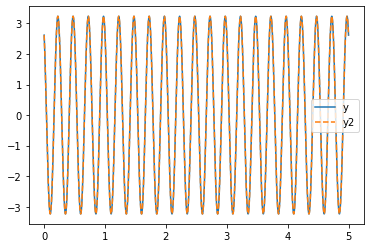

In [4]:
plt.plot(ts, y)
plt.plot(ts, y2, linestyle='--')
plt.legend(["y", "y2"])